<a href="https://colab.research.google.com/github/chathura40/Mini-Research-Project/blob/main/mine_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt


In [3]:
# Directory to dataset in drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

dataset_path = '/content/drive/MyDrive/Colab Notebooks/data/'

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
# This code uses the ImageDataGenerator class from TensorFlow's Keras library to preprocess and load image data from the specified directory dataset_path. 
# The images are resized to the specified image_size of (150, 150) and normalized by dividing each pixel value by 255. 


image_size = (150,150)
batch_size = 2


# Data generators
"""
The training data is divided into training and validation sets using the validation_split argument of the ImageDataGenerator, 
with 20% of the data set aside for validation. The training and validation sets are then loaded into train_batches and validation_batches generators, 
respectively, with a batch size of 2. 
Finally, the test data is loaded into the test_batches generator, also with a batch size of 2. Note that shuffle is set to False for the test data, 
meaning that the data will be processed in order, but later I put this to True>> check results. 
It's important to ensure that the images in the dataset_path directory are properly structured and organized, 
with each class in a separate subdirectory. Also, make sure the dataset_path is set to the correct directory path.

"""

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


train_batches = train_datagen.flow_from_directory(
        dataset_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        shuffle=True,
        subset='training')


validation_batches = train_datagen.flow_from_directory(
        dataset_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        shuffle=True,
        subset='validation')


test_batches = train_datagen.flow_from_directory(
        dataset_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary', 
        shuffle=True,
        subset='validation')


Found 8 images belonging to 2 classes.
Found 2 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


In [52]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,2)
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

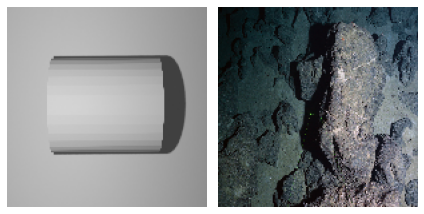

[0. 1.]


In [65]:
"""
Batch is 2 and have a total of 10 images, also total 4 out of that 10 to validation and training, then only 6 images remain test
so batch can go as 0,1,2 only
"""
imgs, labels = train_batches[1]
plotImages(imgs)
print(labels[:2])

In [61]:
# to get different images in the same batch every time you run the code, use seed...But..that not available after TF 2.4, so have to go with shuffle
# train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, seed=None) 

tf.__version__

'2.9.2'